<b> Análisis previo de los datos </b>

In [23]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

trainingStations = 'trainingStations.csv'
deployStations = 'deployStations.csv'
testStations = 'testStations.csv'
Stations_DistanceMatrix = 'Stations_DistanceMatrix.csv'

df_trainingStations = pd.read_csv(trainingStations)
df_deployStations = pd.read_csv(deployStations)
df_testStations = pd.read_csv(testStations)
df_Stations_DistanceMatrix = pd.read_csv(Stations_DistanceMatrix)



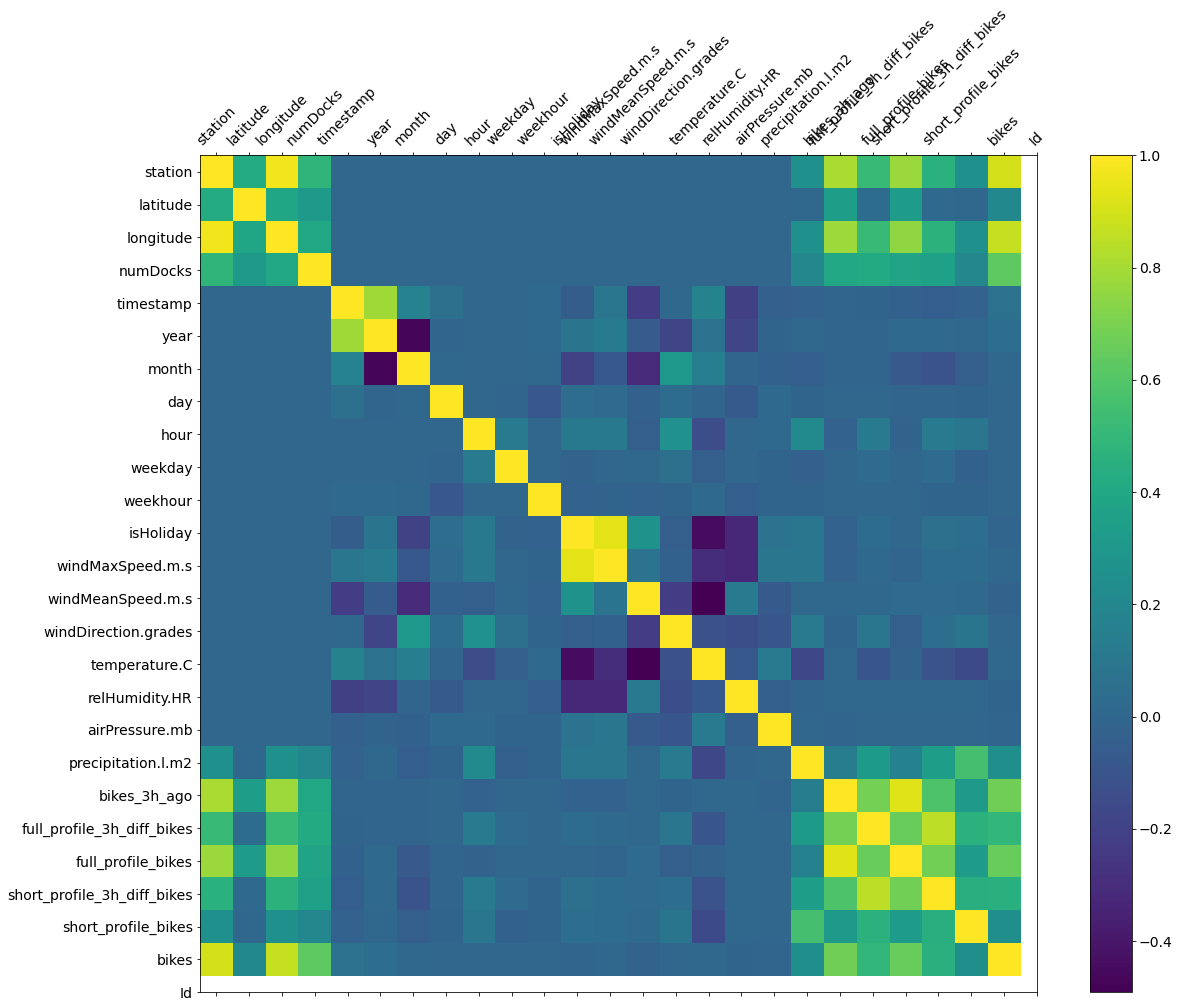

In [24]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_trainingStations.corr(), fignum=f.number)
plt.xticks(range(df_trainingStations.shape[1]), df_trainingStations.columns, fontsize=14, rotation=45)
plt.yticks(range(df_trainingStations.shape[1]), df_trainingStations.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

In [25]:
df_trainingStations

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekday,...,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes,Id
0,1,39.480014,-0.382972,20,1.356995e+09,2013,1,1,0,Tuesday,...,NaN,NaN,NaN,7.0,-0.700000,5.866667,0.500000,3.750000,4,1
1,1,39.480014,-0.382972,20,1.356998e+09,2013,1,1,1,Tuesday,...,57.0,1011.0,0.0,5.0,-2.000000,4.214286,0.750000,3.500000,7,2
2,1,39.480014,-0.382972,20,1.357002e+09,2013,1,1,2,Tuesday,...,59.0,1010.0,0.0,5.0,-2.793103,3.793103,1.250000,4.000000,11,3
3,1,39.480014,-0.382972,20,1.357006e+09,2013,1,1,3,Tuesday,...,57.0,1010.0,0.0,NaN,-2.633333,3.233333,0.500000,4.250000,10,4
4,1,39.480014,-0.382972,20,1.357009e+09,2013,1,1,4,Tuesday,...,57.0,1009.0,0.0,7.0,-2.500000,1.733333,0.500000,4.000000,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198115,113,39.481157,-0.343646,38,1.401556e+09,2014,5,31,19,Saturday,...,57.0,1005.0,0.0,26.0,8.022572,8.024128,9.323923,9.322437,17,198116
198116,113,39.481157,-0.343646,38,1.401559e+09,2014,5,31,20,Saturday,...,58.0,1005.0,0.0,27.0,8.023670,8.023664,9.337296,9.291233,0,198117
198117,113,39.481157,-0.343646,38,1.401563e+09,2014,5,31,21,Saturday,...,59.0,1006.0,0.0,22.0,8.024479,8.023199,9.334324,9.276374,0,198118
198118,113,39.481157,-0.343646,38,1.401566e+09,2014,5,31,22,Saturday,...,61.0,1006.0,0.0,17.0,8.024999,8.022735,9.322437,9.274889,0,198119


In [26]:
df_trainingStations.to_csv('Prueba.csv', index=False)

In [27]:
#Sustituimos los . de las colmnas por _
df_trainingStations.rename(columns={'windMaxSpeed.m.s':'windMaxSpeed_m_s',
                          'windMeanSpeed.m.s':'windMeanSpeed_m_s',
                          'windDirection.grades':'windDirection_grades',
                          'temperature.C':'temperature_C',
                          'relHumidity.HR':'relHumidity_HR',
                          'airPressure.mb':'airPressure_mb',
                          'precipitation.l.m2':'precipitation_l_m2'}, 
                 inplace=True)

df_testStations.rename(columns={'windMaxSpeed.m.s':'windMaxSpeed_m_s',
                          'windMeanSpeed.m.s':'windMeanSpeed_m_s',
                          'windDirection.grades':'windDirection_grades',
                          'temperature.C':'temperature_C',
                          'relHumidity.HR':'relHumidity_HR',
                          'airPressure.mb':'airPressure_mb',
                          'precipitation.l.m2':'precipitation_l_m2'}, 
                 inplace=True)

In [28]:
#Dataframe en el que se calcula la media para las columnas que queremos sustituir los datos
#faltantes. En el se calcula la media y se agrupa por año, mes y día.

df_training_mean_day = df_trainingStations[['station','year','month','day',\
                                            'windMaxSpeed_m_s','windMeanSpeed_m_s',\
                                            'windDirection_grades','temperature_C',\
                                            'relHumidity_HR','airPressure_mb',\
                                            'precipitation_l_m2','bikes_3h_ago']]\
                                            .groupby(['station','year','month','day']).mean()

In [29]:
#Bucle en el que se rellenan los datos faltantes. En cada uno de los for se localizan los valores
#faltantes y estos se sustituyen por los que hemos calculado en el dataframe de la celda anterior.
import math

print('Reemplazando valores faltantes para windMaxSpeed_m_s...')

counter = 0
for index, row in df_trainingStations.iterrows():

    if math.isnan(row['windMaxSpeed_m_s']) == True:
        mean = df_training_mean_day[df_training_mean_day.index.get_level_values('station') == row['station']]
        mean = mean[mean.index.get_level_values('year') == row['year']]
        mean = mean[mean.index.get_level_values('month') == row['month']]
        mean = mean[mean.index.get_level_values('day') == row['day']]
        for index, row in mean.iterrows():
            mean_result = row['windMaxSpeed_m_s']
        df_trainingStations.loc[counter,'windMaxSpeed_m_s'] = mean_result
    counter = counter+1
        
print('Valores para windMaxSpeed_m_s reemplazados')
print('Reemplazando valores faltantes para windMeanSpeed_m_s...')

counter = 0
for index, row in df_trainingStations.iterrows():
    if math.isnan(row['windMeanSpeed_m_s']) == True:
        mean = df_training_mean_day[df_training_mean_day.index.get_level_values('station') == row['station']]
        mean = mean[mean.index.get_level_values('year') == row['year']]
        mean = mean[mean.index.get_level_values('month') == row['month']]
        mean = mean[mean.index.get_level_values('day') == row['day']]
        for index, row in mean.iterrows():
            mean_result = row['windMeanSpeed_m_s']
        df_trainingStations.loc[counter,'windMeanSpeed_m_s'] = mean_result
    counter = counter+1    
    
print('Valores para windMaxSpeed_m_s reemplazados')  
print('Reemplazando valores faltantes para windDirection_grades...')

counter = 0
for index, row in df_trainingStations.iterrows():
    if math.isnan(row['windDirection_grades']) == True:
        mean = df_training_mean_day[df_training_mean_day.index.get_level_values('station') == row['station']]
        mean = mean[mean.index.get_level_values('year') == row['year']]
        mean = mean[mean.index.get_level_values('month') == row['month']]
        mean = mean[mean.index.get_level_values('day') == row['day']]
        for index, row in mean.iterrows():
            mean_result = row['windDirection_grades']
        df_trainingStations.loc[counter,'windDirection_grades'] = mean_result
    counter = counter+1
    
print('Valores para windDirection_grades reemplazados')  
print('Reemplazando valores faltantes para windDirection_grades...')

counter = 0
for index, row in df_trainingStations.iterrows():
    if math.isnan(row['temperature_C']) == True:
        mean = df_training_mean_day[df_training_mean_day.index.get_level_values('station') == row['station']]
        mean = mean[mean.index.get_level_values('year') == row['year']]
        mean = mean[mean.index.get_level_values('month') == row['month']]
        mean = mean[mean.index.get_level_values('day') == row['day']]
        for index, row in mean.iterrows():
            mean_result = row['temperature_C']
        df_trainingStations.loc[counter,'temperature_C'] = mean_result
        counter = counter + 1
        
print('Valores para temperature_C reemplazados')  
print('Reemplazando valores faltantes para relHumidity_HR...')

counter = 0
for index, row in df_trainingStations.iterrows():
    if math.isnan(row['relHumidity_HR']) == True:
        mean = df_training_mean_day[df_training_mean_day.index.get_level_values('station') == row['station']]
        mean = mean[mean.index.get_level_values('year') == row['year']]
        mean = mean[mean.index.get_level_values('month') == row['month']]
        mean = mean[mean.index.get_level_values('day') == row['day']]
        for index, row in mean.iterrows():
            mean_result = row['relHumidity_HR']
        df_trainingStations.loc[counter,'relHumidity_HR'] = mean_result
    counter = counter+1
        
print('Valores para relHumidity_HR reemplazados')  
print('Reemplazando valores faltantes para airPressure_mb...')

counter = 0
for index, row in df_trainingStations.iterrows():
    if math.isnan(row['airPressure_mb']) == True:
        mean = df_training_mean_day[df_training_mean_day.index.get_level_values('station') == row['station']]
        mean = mean[mean.index.get_level_values('year') == row['year']]
        mean = mean[mean.index.get_level_values('month') == row['month']]
        mean = mean[mean.index.get_level_values('day') == row['day']]
        for index, row in mean.iterrows():
            mean_result = row['airPressure_mb']
        df_trainingStations.loc[counter,'airPressure_mb'] = mean_result
    counter = counter+1
        
print('Valores para airPressure_mb reemplazados')  
print('Reemplazando valores faltantes para airPressure_mb...')

counter = 0
for index, row in df_trainingStations.iterrows():
    if math.isnan(row['precipitation_l_m2']) == True:
        mean = df_training_mean_day[df_training_mean_day.index.get_level_values('station') == row['station']]
        mean = mean[mean.index.get_level_values('year') == row['year']]
        mean = mean[mean.index.get_level_values('month') == row['month']]
        mean = mean[mean.index.get_level_values('day') == row['day']]
        for index, row in mean.iterrows():
            mean_result = row['precipitation_l_m2']
        df_trainingStations.loc[counter,'precipitation_l_m2'] = mean_result
    counter = counter+1
    
print('Valores para precipitation_l_m2 reemplazados')  
print('Reemplazando valores faltantes para bikes_3h_ago...')

counter = 0
for index, row in df_trainingStations.iterrows():
    if math.isnan(row['bikes_3h_ago']) == True:
        mean = df_training_mean_day[df_training_mean_day.index.get_level_values('station') == row['station']]
        mean = mean[mean.index.get_level_values('year') == row['year']]
        mean = mean[mean.index.get_level_values('month') == row['month']]
        mean = mean[mean.index.get_level_values('day') == row['day']]
        for index, row in mean.iterrows():
            mean_result = row['bikes_3h_ago']
        df_trainingStations.loc[counter,'bikes_3h_ago'] = mean_result
    counter = counter+1
    
print('Valores para bikes_3h_ago reemplazados') 
print('----------------------------------------')
print('Se han sustituido los valores faltantes por la media.')

Reemplazando valores faltantes para windMaxSpeed_m_s...
Valores para windMaxSpeed_m_s reemplazados
Reemplazando valores faltantes para windMeanSpeed_m_s...
Valores para windMaxSpeed_m_s reemplazados
Reemplazando valores faltantes para windDirection_grades...
Valores para windDirection_grades reemplazados
Reemplazando valores faltantes para windDirection_grades...
Valores para temperature_C reemplazados
Reemplazando valores faltantes para relHumidity_HR...
Valores para relHumidity_HR reemplazados
Reemplazando valores faltantes para airPressure_mb...
Valores para airPressure_mb reemplazados
Reemplazando valores faltantes para airPressure_mb...
Valores para precipitation_l_m2 reemplazados
Reemplazando valores faltantes para bikes_3h_ago...
Valores para bikes_3h_ago reemplazados
----------------------------------------
Se han sustituido los valores faltantes por la media.


In [30]:
df_trainingStations

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekday,...,relHumidity_HR,airPressure_mb,precipitation_l_m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes,Id
0,1,39.480014,-0.382972,20,1.356995e+09,2013,1,1,0,Tuesday,...,49.217391,1010.652174,0.0,7.000000,-0.700000,5.866667,0.500000,3.750000,4,1
1,1,39.480014,-0.382972,20,1.356998e+09,2013,1,1,1,Tuesday,...,57.000000,1011.000000,0.0,5.000000,-2.000000,4.214286,0.750000,3.500000,7,2
2,1,39.480014,-0.382972,20,1.357002e+09,2013,1,1,2,Tuesday,...,59.000000,1010.000000,0.0,5.000000,-2.793103,3.793103,1.250000,4.000000,11,3
3,1,39.480014,-0.382972,20,1.357006e+09,2013,1,1,3,Tuesday,...,57.000000,1010.000000,0.0,5.304348,-2.633333,3.233333,0.500000,4.250000,10,4
4,1,39.480014,-0.382972,20,1.357009e+09,2013,1,1,4,Tuesday,...,57.000000,1009.000000,0.0,7.000000,-2.500000,1.733333,0.500000,4.000000,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198115,113,39.481157,-0.343646,38,1.401556e+09,2014,5,31,19,Saturday,...,57.000000,1005.000000,0.0,26.000000,8.022572,8.024128,9.323923,9.322437,17,198116
198116,113,39.481157,-0.343646,38,1.401559e+09,2014,5,31,20,Saturday,...,58.000000,1005.000000,0.0,27.000000,8.023670,8.023664,9.337296,9.291233,0,198117
198117,113,39.481157,-0.343646,38,1.401563e+09,2014,5,31,21,Saturday,...,59.000000,1006.000000,0.0,22.000000,8.024479,8.023199,9.334324,9.276374,0,198118
198118,113,39.481157,-0.343646,38,1.401566e+09,2014,5,31,22,Saturday,...,61.000000,1006.000000,0.0,17.000000,8.024999,8.022735,9.322437,9.274889,0,198119


In [31]:
#Guardamos el csv en un archivo con la media en los valores faltantes.
df_trainingStations.to_csv('trainingStationsMissing.csv', index=False)

In [32]:
testStations_mean = 'trainingStationsMissing.csv'
df_trainingStations_mean = pd.read_csv(testStations_mean)

In [33]:
#Reemplazamos los valores faltantes por la media total de los demás (es probable que 
#durante todo un día no se hayan recogido datos, es por eso que algunas columnas siguen 
#con datos faltantes)
counter = 0
mean_whole_col = df_trainingStations_mean[['bikes_3h_ago']].mean(skipna = True)
for index, row in df_trainingStations_mean.iterrows():
    if math.isnan(row['bikes_3h_ago']) == True:
        df_trainingStations_mean.loc[counter,'bikes_3h_ago'] = mean_whole_col.values[0]
    counter = counter + 1
    
counter = 0
mean_whole_col = df_trainingStations_mean[['temperature_C']].mean(skipna = True)
for index, row in df_trainingStations_mean.iterrows():
    if math.isnan(row['temperature_C']) == True:
        df_trainingStations_mean.loc[counter,'temperature_C'] = mean_whole_col.values[0]
    counter = counter + 1

In [34]:
#Primero pasamos las variables cualitativas a cuantitativas (solo los días de la semana):
# Monday -> 1
# Tuesday -> 2
# Wednesday -> 3
# Thursday -> 4
# Friday -> 5
# Saturday -> 6
# Sunday -> 7

def switch_weekday(arg):
    switcher = {
        "Monday": 1,
        "Tuesday": 2,
        "Wednesday": 3,
        "Thursday": 4,
        "Friday": 5,
        "Saturday": 6,
        "Sunday": 7,
    }
    return switcher.get(arg, "Invalid Weekday")

In [35]:
col_to_change = ["weekday"]

print("Cambiando variable cualitativa por cuantitativa...")

for index, row in df_trainingStations_mean.iterrows():
    df_trainingStations_mean.loc[index,col_to_change] = switch_weekday(row["weekday"])
print("Variables cambiadas satisfactoriamente.")

Cambiando variable cualitativa por cuantitativa...
Variables cambiadas satisfactoriamente.


In [36]:
del df_trainingStations_mean["year"]

In [37]:
df_trainingStations_mean

,station,latitude,longitude,numDocks,timestamp,month,day,hour,weekday,weekhour,...,relHumidity_HR,airPressure_mb,precipitation_l_m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes,Id
0,1,39.480014,-0.382972,20,1.356995e+09,1,1,0,2,25,...,49.217391,1010.652174,0.0,7.000000,-0.700000,5.866667,0.500000,3.750000,4,1
1,1,39.480014,-0.382972,20,1.356998e+09,1,1,1,2,26,...,57.000000,1011.000000,0.0,5.000000,-2.000000,4.214286,0.750000,3.500000,7,2
2,1,39.480014,-0.382972,20,1.357002e+09,1,1,2,2,27,...,59.000000,1010.000000,0.0,5.000000,-2.793103,3.793103,1.250000,4.000000,11,3
3,1,39.480014,-0.382972,20,1.357006e+09,1,1,3,2,28,...,57.000000,1010.000000,0.0,5.304348,-2.633333,3.233333,0.500000,4.250000,10,4
4,1,39.480014,-0.382972,20,1.357009e+09,1,1,4,2,29,...,57.000000,1009.000000,0.0,7.000000,-2.500000,1.733333,0.500000,4.000000,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198115,113,39.481157,-0.343646,38,1.401556e+09,5,31,19,6,138,...,57.000000,1005.000000,0.0,26.000000,8.022572,8.024128,9.323923,9.322437,17,198116
198116,113,39.481157,-0.343646,38,1.401559e+09,5,31,20,6,139,...,58.000000,1005.000000,0.0,27.000000,8.023670,8.023664,9.337296,9.291233,0,198117
198117,113,39.481157,-0.343646,38,1.401563e+09,5,31,21,6,140,...,59.000000,1006.000000,0.0,22.000000,8.024479,8.023199,9.334324,9.276374,0,198118
198118,113,39.481157,-0.343646,38,1.401566e+09,5,31,22,6,141,...,61.000000,1006.000000,0.0,17.000000,8.024999,8.022735,9.322437,9.274889,0,198119


In [38]:
df_trainingStations_mean.to_csv('trainingStationsMissing.csv', index=False)

In [39]:
#Normalizamos todas las columnas menos "Station" e "ID"
df_trainingStations_mean_mmn = df_trainingStations_mean

cols_to_norm = ["station", "latitude", "longitude", "numDocks", "timestamp", "month", \
                "day", "hour", "weekday", "weekhour", "isHoliday", "windMaxSpeed_m_s", \
                "windMeanSpeed_m_s", "windDirection_grades", "temperature_C", "relHumidity_HR", \
                "airPressure_mb", "precipitation_l_m2", "bikes_3h_ago", \
                "full_profile_3h_diff_bikes", "full_profile_bikes", \
                "short_profile_3h_diff_bikes", "short_profile_bikes"]
df_trainingStations_mean_mmn[cols_to_norm] = df_trainingStations_mean_mmn[cols_to_norm] \
.apply(lambda x: (x - x.min()) / (x.max() - x.min()))


In [40]:
df_trainingStations_mean_zscore = df_trainingStations_mean
#Valor absoluto de la Z-Score Normalization.
df_trainingStations_mean_zscore[cols_to_norm] = df_trainingStations_mean_zscore[cols_to_norm] \
.apply(lambda x: (x - x.mean()) / (x.std(ddof=0)))

In [41]:
df_trainingStations_mean_zscore

,station,latitude,longitude,numDocks,timestamp,month,day,hour,weekday,weekhour,...,relHumidity_HR,airPressure_mb,precipitation_l_m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes,Id
0,-1.073977,0.929882,-1.213803,-0.683290,-1.731867,-1.323280,-1.672743,-1.661580,-1.00233,-1.229603,...,-0.414667,0.418567,-0.063604,-0.097680,-0.932455,-0.459985,-0.704587,-0.859403,4,1
1,-1.073977,0.929882,-1.213803,-0.683290,-1.731588,-1.323280,-1.672743,-1.517109,-1.00233,-1.208933,...,0.074615,0.448996,-0.063604,-0.327360,-1.144962,-0.848615,-0.666024,-0.911014,7,2
2,-1.073977,0.929882,-1.213803,-0.683290,-1.731308,-1.323280,-1.672743,-1.372638,-1.00233,-1.188263,...,0.200352,0.361515,-0.063604,-0.327360,-1.274608,-0.947675,-0.588897,-0.807792,11,3
3,-1.073977,0.929882,-1.213803,-0.683290,-1.731028,-1.323280,-1.672743,-1.228168,-1.00233,-1.167593,...,0.074615,0.361515,-0.063604,-0.292409,-1.248491,-1.079329,-0.704587,-0.756181,10,4
4,-1.073977,0.929882,-1.213803,-0.683290,-1.730749,-1.323280,-1.672743,-1.083697,-1.00233,-1.146923,...,0.074615,0.274034,-0.063604,-0.097680,-1.226695,-1.432120,-0.704587,-0.807792,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198115,1.108153,1.328760,0.890846,1.455762,1.730771,-0.146677,1.743359,1.083364,1.00269,1.106090,...,0.074615,-0.075890,-0.063604,2.084280,0.493395,0.047436,0.656538,0.290994,17,198116
198116,1.108153,1.328760,0.890846,1.455762,1.731051,-0.146677,1.743359,1.227835,1.00269,1.126760,...,0.137484,-0.075890,-0.063604,2.199120,0.493574,0.047327,0.658601,0.284552,0,198117
198117,1.108153,1.328760,0.890846,1.455762,1.731330,-0.146677,1.743359,1.372306,1.00269,1.147430,...,0.200352,0.011591,-0.063604,1.624920,0.493706,0.047218,0.658143,0.281484,0,198118
198118,1.108153,1.328760,0.890846,1.455762,1.731610,-0.146677,1.743359,1.516777,1.00269,1.168100,...,0.326090,0.011591,-0.063604,1.050720,0.493791,0.047109,0.656309,0.281178,0,198119


In [43]:
df_trainingStations_mean_mmn.to_csv('trainingStationsMissingNormMMN.csv', index=False)
df_trainingStations_mean_zscore.to_csv('trainingStationsMissingNormZScore.csv', index=False)